# 2022-September-14

In [1]:
from IPython.display import HTML, display, Image

## 1st feature
### Automating the iteration to apply the DMD overrelaxation
I implemented this based on the slope of the residual.\
For this, I collected a deque of data with residual norms in it, and ran a linear regression on its log values. This gave me the slope of that section of the residual history.\
Then I compared these slopes with the last slope, if the ratio of the $\dfrac{new\_slope}{old\_slope}$ becomes close to $1 (1 \pm0.001)$ it activates the DMD.\
A challenge with this method is to choose the appropriate number of residual point to do the regression on.
- For example, for the Navier--Stokes case, without applying the DMD overrelaxation we have more than 2000 iterations for the problem to converge, and slope changes happen in longer periods(about 250 iterations to reach a relatively constant slope). So for this problem, I am collecting 100 residual points for the regression.
- For the Poisson case, without the DMD update, we have around 1000 iterations to converge, and slope changes happen in shorter periods. For example for Poisson we reach a constant slope in approximately 70 iterations. So for this problem I am collecting only 20 residual points to do regression on. <br>
<br>So basically, for different problems we need to hand-tune this paramter so that it suits the problem. And this parameter is mostly affected by: how the slope changes per iteration.

## 2nd feature
### Automating the selection of low-rank svd approximation
These test cases also use automatic set-up of the DMD matrix. So it automatically selects the appropriate rank-approximation for the low-rank SVD. For this case I used the simple approach of just keeping the singularvalues that are greater than $e-15$.\
Now let's see a few test results that were automated by this method:

In [7]:
display(HTML("<table><tr><td><img src='NavierStokes_resplots_diffsnaps.png'></td><td><img src='Poisson_resplots_diffsnaps.png'></td></tr></table>"))

,


For the poisson case I am collecting 20 residual points, and do the regression on that data to find the slope.\
For Navier--Stokes, I coolect 100 residual points.

## Burgers 2D 
Automating the iteration selection part didn't work exactly as I expected for the burgers2D problem.\
I think all of these goes back to selecting the proper number for the size of the vector we are doing regression on. Because by just looking at the residual plot we can see when the slope becomes constant (constant oscillatory behaviour or constant slope). So we have to find a way to implement a logic so that the program can understand this too.\\
Also, the measure I used to check the slope ratio, $\dfrac{new\_slope}{old\_slope}$ becomes close to $1 (1 \pm0.001)$, is not accurate for all the cases, for example for this burgers problem.\
***
Note to myself: We are calculating the slope of the log of the residual history. The residual plot is decreasing, so a smaller slope of the log-residual means steeper slope, and a higher number for the slope means slower convergence.
***

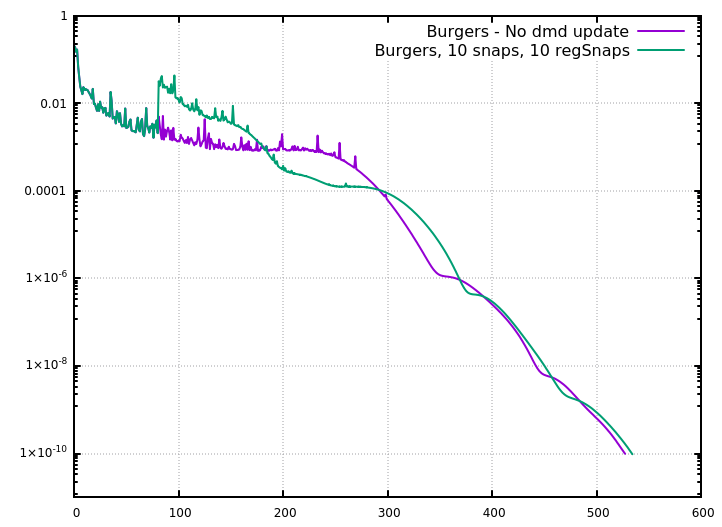

In [2]:
Image(filename='Burgers_resplot_diffsnaps.png') 

In the above plot we can see that the burgers equation has noisy residual for the first 280 iteration, and it is not a proper time to apply dmd upate at those iterations. But the current automatic iteration selection method couldn't ignore the noisy part, and selected iteration 80 to compute and apply a DMD update.\
> I am doing regression on the different sections of the residual history, so maybe I can also check for outliers, and when we have a large number of outliers in a residual section, we can ignore the result for the slope, and assume that part as "Not applicable for DMD update".